In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Support Vector Regression and Feature Selection with Lasso, Ridge, ElasticNet in Python

Today we'll use `scikit-learn`'s implementation of these models. 

## What is Support Vector Regression? 

In Support Vector Regression (SVR), the separating hyperplane from Support Vector Machines (SVM) is instead used as the regression line and the decision boundary is used to determine best fit. The benefit of using SVR is that it can capture non-linearity and is robust to outliers and can offer a very flexible fit (with all of those downsides). So in a prediction/forecasting setting this might be very accurate, but you don't get interpretability or inference.

### Example Data

I'll generate some artificial data to play with that is similar to the data that we encounter in FP&A, so this could be R&D spending over the life of a program or new product sales:

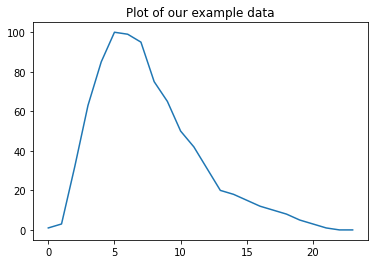

In [3]:
# Set example data
y = np.array([1, 3, 32, 63, 85, 100, 99, 95, 75, 65, 50, 
        42, 31, 20, 18, 15, 12, 10, 8, 5, 3, 1, 0, 0])
x = np.arange(0,len(y))

plt.plot(x, y, label="Actuals")
plt.title("Plot of our example data")
plt.show()

We're going to start with a bad example of SVR: we'll use SVR for time-series forecasting. So we'll split the data into a training set and a test set, with the training set as an example of the historical/actual data you have to date and you're asked to predict future sales, etc a few periods into the future.

In [4]:
# Set the first 18 entries 
test_size = 18

X = x.reshape(-1, 1) # Convert the array into a column
X_train = X[:test_size]
X_test = X[test_size:]
y_train = y[:test_size]
y_test = y[test_size:]

## Scikit-learn

Next we'll import what we need from `sklearn`

In [6]:
from sklearn.svm import SVR

### Aside: The `sklearn` workflow

The most basic `sklearn` model workflow goes something like this:

1. Instantiate the model class, i.e. `model = LinearRegression()` for Linear Regression
2. Fit the model, i.e. `model.fit(X_train, y_train)`
3. Use the fitted model to make a prediction on new data, i.e. `model.predict(X_test)` 

This standard interface is what makes `sklearn` so powerful - with `.fit()` and `.predict()` and a huge variety of models in the library, you can use this common language to try all sorts of machine learning models. 

And that's just the start, from this basic 3-step pipeline you can add all kinds of additional steps to this worfklow that make experimentation very convenient for the user.

## Instantiate the `SVR` Support Vector Regression Model  and score

Here, we'll fit the support vector regression model with the default parameters on our data to show how it looks

In [7]:
model = SVR(C=1.0, epsilon=0.1, kernel='rbf')
model.fit(X_train, y_train)
R_2 = model.score(X_train, y_train)
# print the score rounded to two digits
print("R^2 Value: ", np.round(R_2,2))

R^2 Value:  0.1


That's a pretty poor fit on the training data! Let's see what happened visually.

In order to view the fitted data, we'll use the `.predict()` method for our model and call it on the training data. This takes the model that we had just solved for and use it to interpolate on the training data.

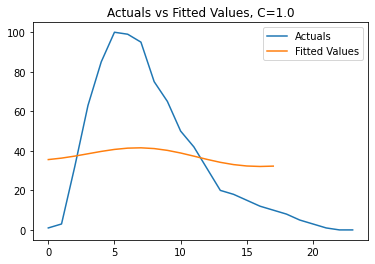

In [8]:
y_fitted = model.predict(X_train)

# Plot both the Actuals and Fitted Values
plt.plot(X, y, label="Actuals")
plt.plot(X_train, y_fitted, label="Fitted Values")
plt.title("Actuals vs Fitted Values, C=1.0")
plt.legend()
plt.show()

Already we can see this is a poor fit, so at this point you'll need to tune the model parameters (aka the 'hyperparameters'). The three hyperparameters in this example were `C`, `epsilon`, and the `kernel`. 

Now, by default `C` is set to 1.0, and it's *inversely* proportional to the strength of regularization (which helps overfitting). So, the higher the value of `C`, then the model will be more flexible because it's not penalizing the additional terms as much. We can see this if we increase `C` to 100:

In [9]:
model = SVR(C=100.0, epsilon=0.1, kernel='rbf')
model.fit(X_train, y_train)
R_2 = model.score(X_train, y_train)
# print the score rounded to two digits
print("R^2 Value: ", np.round(R_2,2))

R^2 Value:  0.99


And to nail the point home, we can look at the plot:

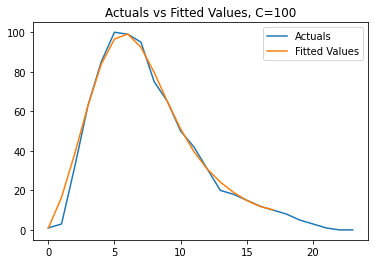

In [10]:
y_fitted = model.predict(X_train)

# Plot both the Actuals and Fitted Values
plt.plot(X, y, label="Actuals")
plt.plot(X_train, y_fitted, label="Fitted Values")
plt.legend()
plt.title("Actuals vs Fitted Values, C=100")
plt.show()

Now a better measure of model performance in a prediction scenario is how well this model performs on unseen data. Here, we held out the final 6 periods of data where the values of `y` decrease to zero, much like the sales volume of a product nearing its end of life.

To predict on unseen data, we use the `.predict()` method again:

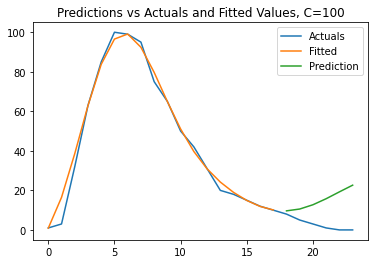

In [11]:
y_pred = model.predict(X_test)
y_fitted = model.predict(X_train)
plt.plot(X, y, label="Actuals")
plt.plot(X_train, y_fitted, label="Fitted")
plt.plot(X_test, y_pred, label="Prediction")
plt.legend()
plt.title("Predictions vs Actuals and Fitted Values, C=100")
plt.show()

So our green 'prediction' curve diverges away from the actuals in a big way. What appeared to be a good fit on the training data now looks like we were overfitting and we're using `SVR` incorrectly. We see already that extrapolation here is similarly bad to what we would see with flexible curve fitting (i.e. polynomial regression) and with classic ordinary least squares regression.

## Thoughts on Inference

So, rather than use this for time series forecasting (specifically extrapolating from a historical time series), you can use this as a more flexible regression option with a regularization penalty (like we have with Lasso/Ridge/ElasticNet) with the same caveats around the bias-variance tradeoff. Another benefit of this model is that it can handle non-linearity and is robust to outliers. There are computational issues with large datasets but in the kind of excel-friendly datasets that we see in FP&A this wouldn't be that big of a problem. 

So you might get a good predictive model from this where you want flexibility and the way to cover non-linear relationships. 